# 🎨 한글 폰트 적용 시각화 시스템 검증

이 노트북은 개선된 시각화 시스템의 한글 폰트 적용을 검증하고 테스트합니다.

In [1]:
# [1] 프로젝트 루트 디렉토리로 이동
import os                                                   # OS 모듈 임포트
import sys                                                  # 시스템 모듈 임포트
os.chdir("../../../")                                       # 프로젝트 루트로 이동
print("현재 작업 디렉토리:", os.getcwd())                      # 현재 디렉토리 출력

현재 작업 디렉토리: /home/ieyeppo/AI_Lab/computer-vision-competition-1SEN


In [2]:
# [2] 주요 라이브러리 임포트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from pathlib import Path
from PIL import Image
import pandas as pd

# 프로젝트 경로 추가
project_root = os.getcwd()

print(f"📁 프로젝트 루트: {project_root}")
print(f"🐍 Python 경로: {sys.path[-1]}")

📁 프로젝트 루트: /home/ieyeppo/AI_Lab/computer-vision-competition-1SEN
🐍 Python 경로: /home/ieyeppo/.pyenv/versions/cv_py3_11_9/lib/python3.11/site-packages


## 1. 한글 폰트 설정 확인

In [3]:
# 나눔고딕 폰트 로드 및 설정
font_path = './font/NanumGothic.ttf'

if os.path.exists(font_path):
    # 폰트 등록
    fontprop = fm.FontProperties(fname=font_path)
    fe = fm.FontEntry(fname=font_path, name='NanumGothic')
    fm.fontManager.ttflist.insert(0, fe)
    
    # matplotlib 설정
    plt.rcParams['font.family'] = ['NanumGothic', 'DejaVu Sans']
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['figure.autolayout'] = True
    plt.rcParams['axes.titlepad'] = 20
    
    print("✅ 나눔고딕 폰트 설정 완료")
    print(f"📝 현재 폰트 패밀리: {plt.rcParams['font.family']}")
else:
    print(f"❌ 폰트 파일을 찾을 수 없습니다: {font_path}")

# 폰트 리스트 확인
print("\n📋 시스템 한글 폰트 목록:")
font_list = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name or 'Gothic' in f.name]
for font in sorted(set(font_list)):
    print(f"  - {font}")

✅ 나눔고딕 폰트 설정 완료
📝 현재 폰트 패밀리: ['NanumGothic', 'DejaVu Sans']

📋 시스템 한글 폰트 목록:
  - NanumGothic


## 2. 간단한 한글 폰트 테스트

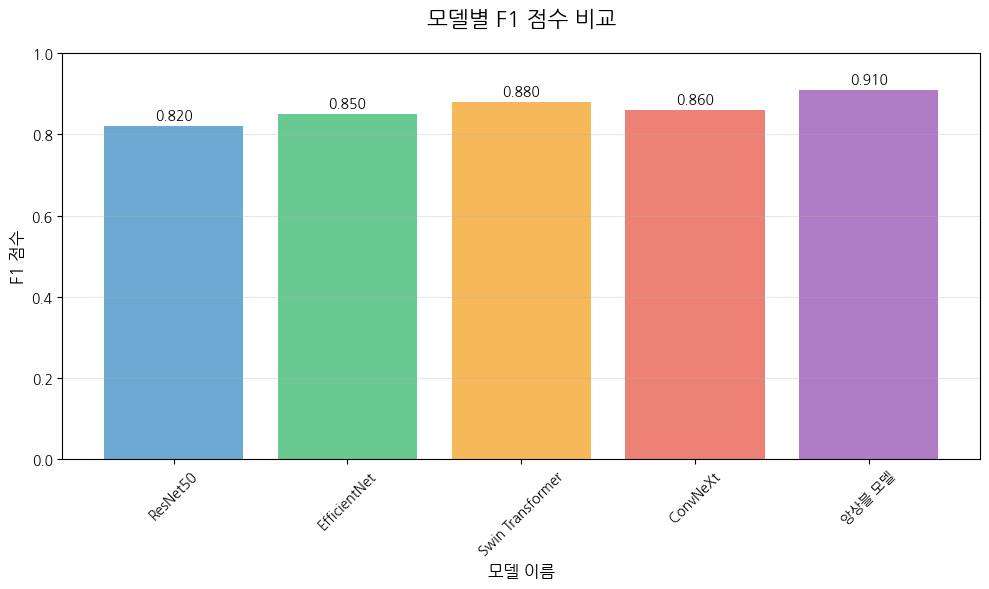

✅ 한글 폰트 테스트 차트 생성 완료


In [4]:
# 한글 텍스트로 간단한 차트 생성
plt.figure(figsize=(10, 6))

# 한글 데이터
models = ['ResNet50', 'EfficientNet', 'Swin Transformer', 'ConvNeXt', '앙상블 모델']
f1_scores = [0.82, 0.85, 0.88, 0.86, 0.91]

# 막대그래프 생성
colors = ['#2E86C1', '#28B463', '#F39C12', '#E74C3C', '#8E44AD']
bars = plt.bar(models, f1_scores, color=colors, alpha=0.7)

# 한글 제목과 라벨
plt.title('모델별 F1 점수 비교', fontsize=16, fontweight='bold')
plt.xlabel('모델 이름', fontsize=12)
plt.ylabel('F1 점수', fontsize=12)

# 막대 위에 값 표시
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
            f'{score:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylim(0, 1)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("✅ 한글 폰트 테스트 차트 생성 완료")

## 3. 시각화 시스템 테스트

In [ ]:
# 시각화 시스템 import
    ""from src.utils.visualizations import create_training_visualizations, create_inference_visualizations
",\n",

print("✅ 시각화 시스템 모듈 로드 완료")

✅ 나눔고딕 폰트 로드 성공
✅ 시각화 시스템 모듈 로드 완료


In [6]:
# 테스트 데이터 생성
test_fold_results = {
    'fold_results': [
        {'fold': 0, 'best_f1': 0.85, 'best_accuracy': 0.87},
        {'fold': 1, 'best_f1': 0.82, 'best_accuracy': 0.84},
        {'fold': 2, 'best_f1': 0.88, 'best_accuracy': 0.89},
        {'fold': 3, 'best_f1': 0.86, 'best_accuracy': 0.87},
        {'fold': 4, 'best_f1': 0.84, 'best_accuracy': 0.85}
    ]
}

test_history = {
    'train_loss': [0.8, 0.6, 0.4, 0.3, 0.25, 0.22, 0.20],
    'val_loss': [0.7, 0.55, 0.45, 0.4, 0.38, 0.37, 0.36],
    'val_f1': [0.75, 0.80, 0.83, 0.85, 0.86, 0.87, 0.86]
}

print("📊 테스트 데이터 생성 완료")
print(f"  - 폴드 수: {len(test_fold_results['fold_results'])}개")
print(f"  - 학습 에포크: {len(test_history['train_loss'])}개")

📊 테스트 데이터 생성 완료
  - 폴드 수: 5개
  - 학습 에포크: 7개


In [ ]:
# 한글 모델명으로 학습 시각화 테스트
model_name = "한글_폰트_테스트_모델"
output_dir = "experiments/notebook_test"

print(f"🧪 학습 시각화 테스트 시작...")
print(f"  모델명: {model_name}")
print(f"  출력 디렉토리: {output_dir}")

try:
    create_training_visualizations(
        fold_results=test_fold_results,
        model_name=model_name,
        output_dir=output_dir,
        history_data=test_history
    )
    print("✅ 학습 시각화 생성 성공!")
except Exception as e:
    print(f"❌ 학습 시각화 생성 실패: {e}")

🧪 학습 시각화 테스트 시작...
  모델명: 한글_폰트_테스트_모델
  출력 디렉토리: experiments/notebook_test
📊 Saved visualization: experiments/notebook_test/images/fold_performance.png
📊 Saved visualization: experiments/notebook_test/images/training_history.png
✅ Training visualizations completed: experiments/notebook_test/images
✅ 학습 시각화 생성 성공!


In [8]:
# 추론 시각화 테스트
np.random.seed(42)
test_predictions = np.random.rand(500, 3)  # 500개 샘플, 3개 클래스
test_confidences = np.max(test_predictions, axis=1)

print(f"🧪 추론 시각화 테스트 시작...")
print(f"  예측 데이터 형태: {test_predictions.shape}")
print(f"  신뢰도 범위: {test_confidences.min():.3f} ~ {test_confidences.max():.3f}")

try:
    create_inference_visualizations(
        predictions=test_predictions,
        model_name=model_name,
        output_dir=output_dir,
        confidence_scores=test_confidences
    )
    print("✅ 추론 시각화 생성 성공!")
except Exception as e:
    print(f"❌ 추론 시각화 생성 실패: {e}")

🧪 추론 시각화 테스트 시작...
  예측 데이터 형태: (500, 3)
  신뢰도 범위: 0.101 ~ 1.000
📊 Saved visualization: experiments/notebook_test/images/inference_analysis.png
✅ Inference visualizations completed: experiments/notebook_test/images
✅ 추론 시각화 생성 성공!


## 4. 생성된 시각화 이미지 확인

In [9]:
# 생성된 이미지 파일 목록
image_dir = Path(output_dir) / "images"
if image_dir.exists():
    image_files = list(image_dir.glob("*.png"))
    print(f"📁 생성된 이미지 파일 ({len(image_files)}개):")
    for img_file in sorted(image_files):
        file_size = img_file.stat().st_size / 1024  # KB
        print(f"  📊 {img_file.name} ({file_size:.1f} KB)")
else:
    print(f"❌ 이미지 디렉토리를 찾을 수 없습니다: {image_dir}")

📁 생성된 이미지 파일 (3개):
  📊 fold_performance.png (86.0 KB)
  📊 inference_analysis.png (203.3 KB)
  📊 training_history.png (295.5 KB)


In [10]:
# 이미지 표시 함수
def display_image(image_path, title=None):
    """이미지 표시"""
    try:
        img = Image.open(image_path)
        plt.figure(figsize=(12, 8))
        plt.imshow(img)
        plt.axis('off')
        if title:
            plt.title(title, fontsize=14, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
        print(f"✅ 이미지 표시 완료: {image_path.name}")
    except Exception as e:
        print(f"❌ 이미지 표시 실패: {e}")

print("🖼️ 이미지 표시 함수 정의 완료")

🖼️ 이미지 표시 함수 정의 완료


/tmp/ipykernel_36276/960217725.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans, NanumGothic.
  plt.tight_layout()
/home/ieyeppo/.pyenv/versions/cv_py3_11_9/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans, NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


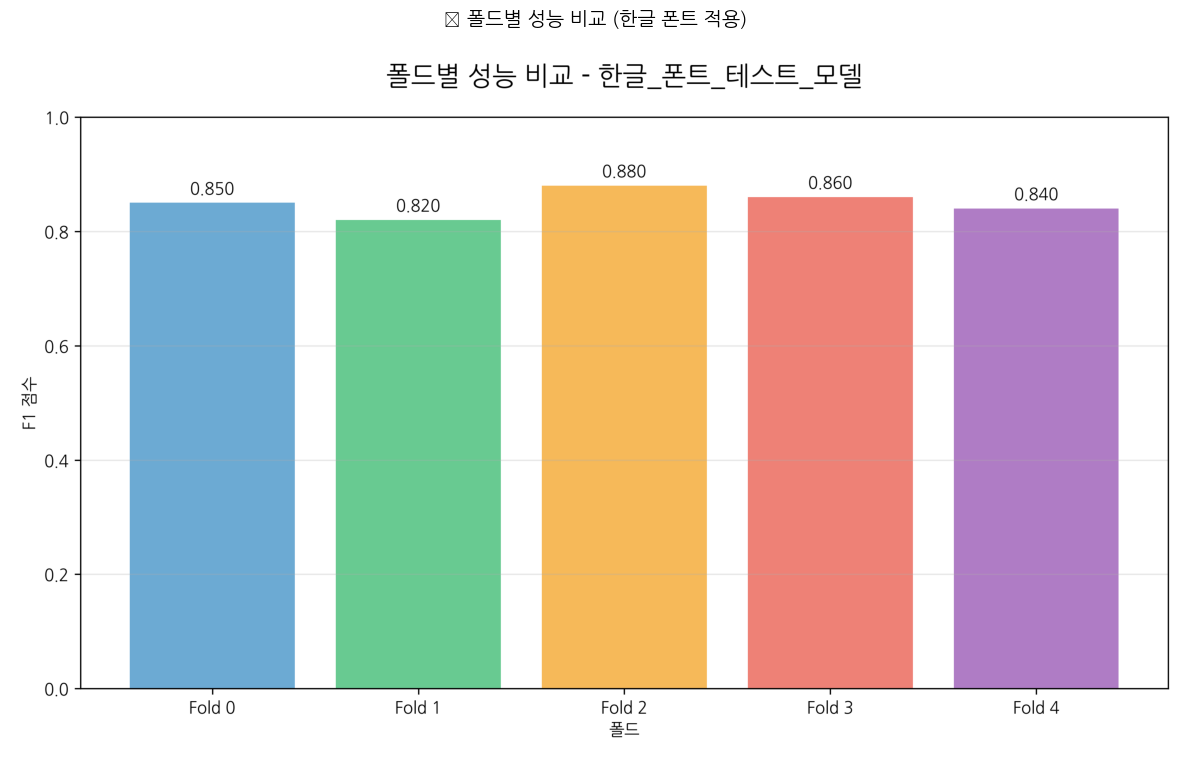

✅ 이미지 표시 완료: fold_performance.png


In [11]:
# 폴드 성능 비교 이미지
fold_perf_path = image_dir / "fold_performance.png"
if fold_perf_path.exists():
    display_image(fold_perf_path, "📊 폴드별 성능 비교 (한글 폰트 적용)")
else:
    print(f"❌ 파일을 찾을 수 없습니다: {fold_perf_path}")

/tmp/ipykernel_36276/960217725.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans, NanumGothic.
  plt.tight_layout()
/home/ieyeppo/.pyenv/versions/cv_py3_11_9/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans, NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


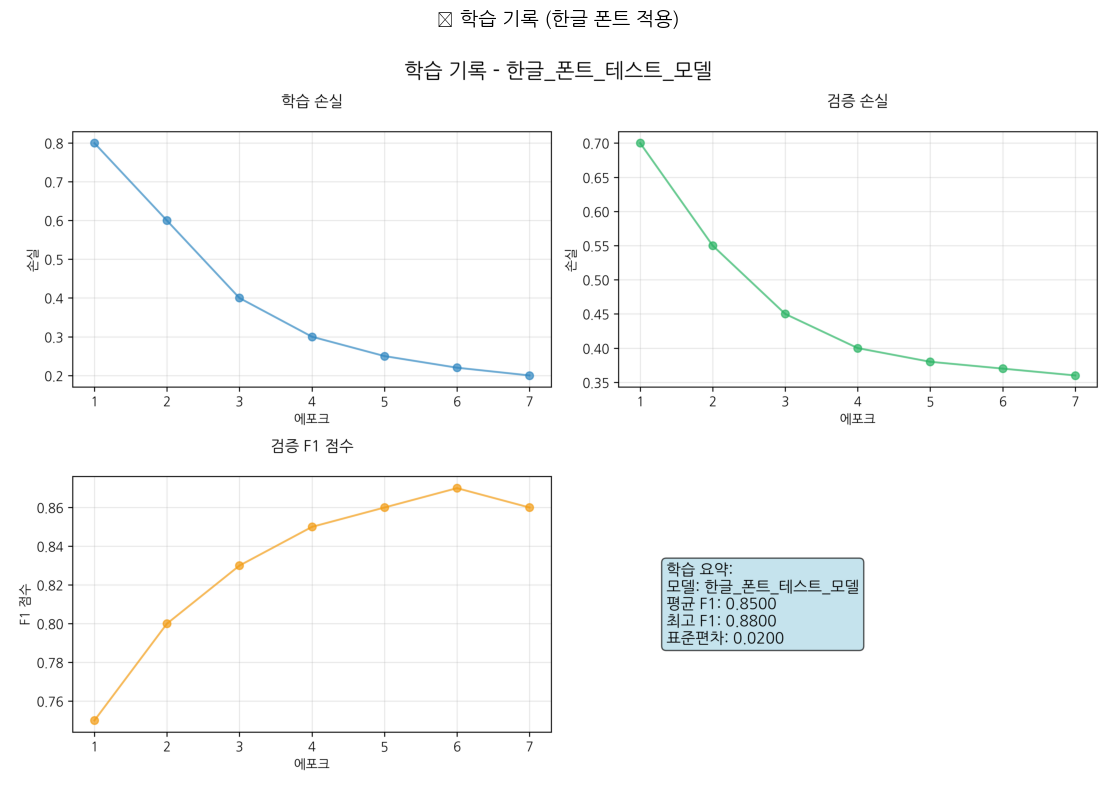

✅ 이미지 표시 완료: training_history.png


In [12]:
# 학습 기록 이미지
train_hist_path = image_dir / "training_history.png"
if train_hist_path.exists():
    display_image(train_hist_path, "📈 학습 기록 (한글 폰트 적용)")
else:
    print(f"❌ 파일을 찾을 수 없습니다: {train_hist_path}")

/tmp/ipykernel_36276/960217725.py:11: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans, NanumGothic.
  plt.tight_layout()
/home/ieyeppo/.pyenv/versions/cv_py3_11_9/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans, NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


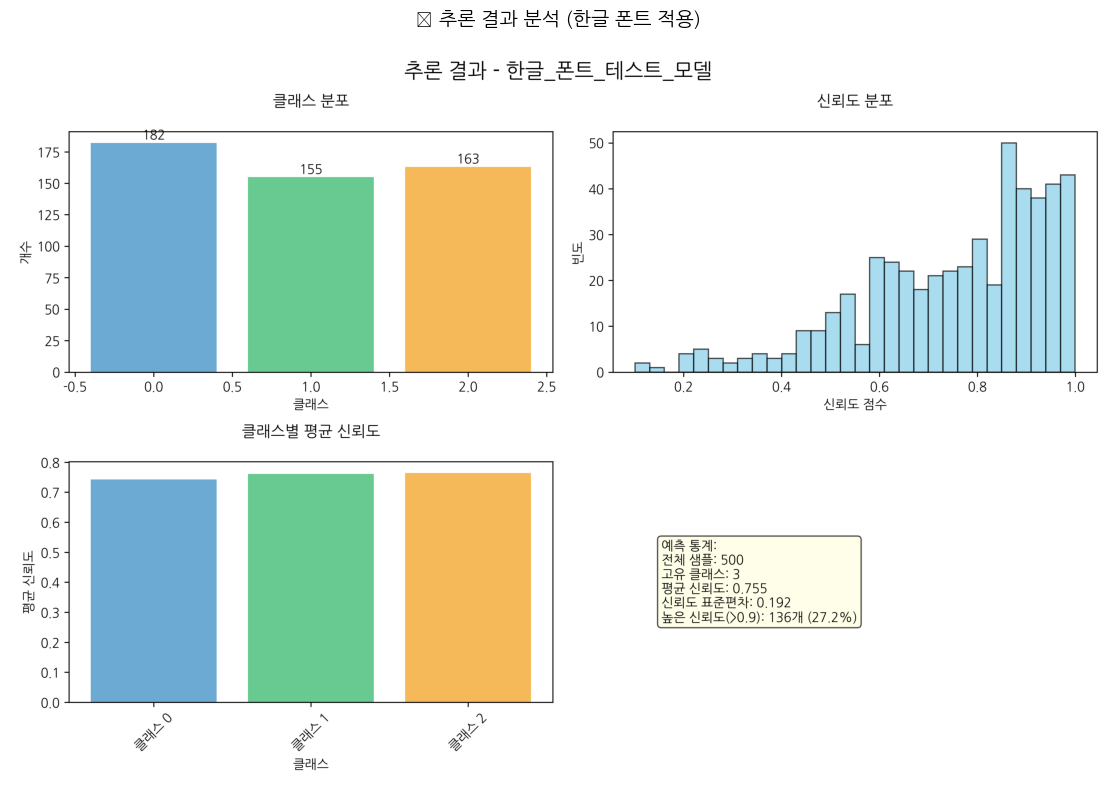

✅ 이미지 표시 완료: inference_analysis.png


In [13]:
# 추론 분석 이미지
infer_path = image_dir / "inference_analysis.png"
if infer_path.exists():
    display_image(infer_path, "🔮 추론 결과 분석 (한글 폰트 적용)")
else:
    print(f"❌ 파일을 찾을 수 없습니다: {infer_path}")

## 5. 한글 폰트 적용 상태 요약

In [14]:
# 폰트 설정 상태 확인
print("🎨 한글 폰트 적용 상태 요약")
print("=" * 50)

# 1. 폰트 파일 존재 확인
font_exists = os.path.exists('./font/NanumGothic.ttf')
print(f"📄 폰트 파일 존재: {'✅' if font_exists else '❌'}")

# 2. matplotlib 설정 확인
current_font = plt.rcParams['font.family']
print(f"🔧 matplotlib 폰트 설정: {current_font}")

# 3. 시각화 시스템 작동 확인
viz_working = image_dir.exists() and len(list(image_dir.glob("*.png"))) > 0
print(f"🎯 시각화 시스템 작동: {'✅' if viz_working else '❌'}")

# 4. 생성된 이미지 개수
image_count = len(list(image_dir.glob("*.png"))) if image_dir.exists() else 0
print(f"📊 생성된 이미지 개수: {image_count}개")

# 5. 한글 텍스트 포함 여부 (간접 확인)
korean_support = font_exists and 'NanumGothic' in str(current_font)
print(f"🇰🇷 한글 지원 상태: {'✅' if korean_support else '❌'}")

print("\n" + "=" * 50)
if font_exists and viz_working and korean_support:
    print("🎉 한글 폰트 적용 시각화 시스템이 정상적으로 작동합니다!")
else:
    print("⚠️ 일부 기능에 문제가 있을 수 있습니다. 위 항목들을 확인해주세요.")

🎨 한글 폰트 적용 상태 요약
📄 폰트 파일 존재: ✅
🔧 matplotlib 폰트 설정: ['NanumGothic', 'DejaVu Sans']
🎯 시각화 시스템 작동: ✅
📊 생성된 이미지 개수: 3개
🇰🇷 한글 지원 상태: ✅

🎉 한글 폰트 적용 시각화 시스템이 정상적으로 작동합니다!


## 6. 추가 테스트: 다양한 한글 텍스트

/tmp/ipykernel_36276/1007152962.py:48: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans, NanumGothic.
  plt.tight_layout()
/home/ieyeppo/.pyenv/versions/cv_py3_11_9/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans, NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


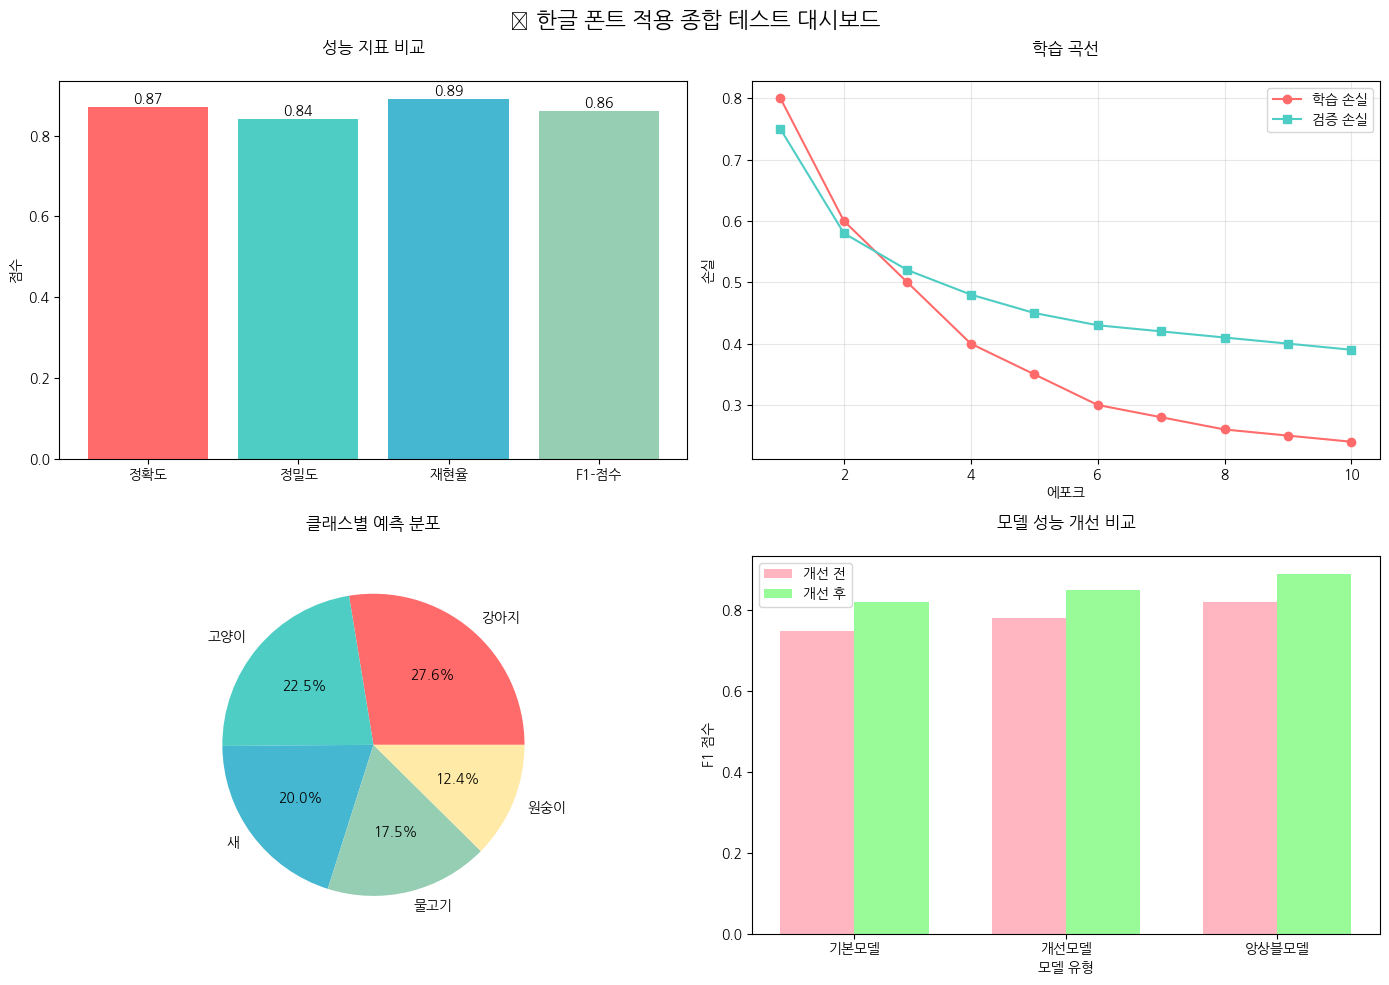

✅ 종합 한글 폰트 테스트 완료!
   모든 한글 텍스트가 정상적으로 표시되었는지 확인해주세요.


In [15]:
# 다양한 한글 텍스트로 종합 테스트
plt.figure(figsize=(14, 10))

# 2x2 서브플롯으로 다양한 차트 생성
plt.subplot(2, 2, 1)
categories = ['정확도', '정밀도', '재현율', 'F1-점수']
values = [0.87, 0.84, 0.89, 0.86]
plt.bar(categories, values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('성능 지표 비교', fontweight='bold')
plt.ylabel('점수')
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', fontweight='bold')

plt.subplot(2, 2, 2)
epochs = range(1, 11)
train_loss = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.26, 0.25, 0.24]
val_loss = [0.75, 0.58, 0.52, 0.48, 0.45, 0.43, 0.42, 0.41, 0.40, 0.39]
plt.plot(epochs, train_loss, 'o-', label='학습 손실', color='#FF6B6B')
plt.plot(epochs, val_loss, 's-', label='검증 손실', color='#4ECDC4')
plt.title('학습 곡선', fontweight='bold')
plt.xlabel('에포크')
plt.ylabel('손실')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
classes = ['강아지', '고양이', '새', '물고기', '원숭이']
predictions = [120, 98, 87, 76, 54]
plt.pie(predictions, labels=classes, autopct='%1.1f%%', 
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('클래스별 예측 분포', fontweight='bold')

plt.subplot(2, 2, 4)
models = ['기본모델', '개선모델', '앙상블모델']
before = [0.75, 0.78, 0.82]
after = [0.82, 0.85, 0.89]
x = np.arange(len(models))
width = 0.35
plt.bar(x - width/2, before, width, label='개선 전', color='#FFB6C1')
plt.bar(x + width/2, after, width, label='개선 후', color='#98FB98')
plt.title('모델 성능 개선 비교', fontweight='bold')
plt.xlabel('모델 유형')
plt.ylabel('F1 점수')
plt.xticks(x, models)
plt.legend()

plt.suptitle('🎨 한글 폰트 적용 종합 테스트 대시보드', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ 종합 한글 폰트 테스트 완료!")
print("   모든 한글 텍스트가 정상적으로 표시되었는지 확인해주세요.")